In [1]:
from CustomXGBoost import (XGBRegressor,
                           XGBRegressorAdam,
                           XGBRegressorRMS,
                           XGBClassifier
                          )
import xgboost

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, log_loss, mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns;sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

We'll use sklearn's diabetes dataset for evaluation

In [3]:
data = load_diabetes()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
# split data into X and y
X = dataset
Y = data["target"]

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=7)

In [4]:
results = dict() # to store results of each model

We'll use default values for parameters as given in XGBoost official Documentation

## XGBoost with Adam Optimizer

In [5]:
custom = XGBRegressorAdam() ## Adam Optimizer is used in this implementation while doing gradient boosting
custom.fit(X_train.values, y_train, eval_set = (X_test.values, y_test)) ## Check CustomXGBoost.py for implementation

y_pred = custom.predict(X_test.values)
results["Adam"] = custom.history

[0] validation_set-rmse : 70.69866601024486	[0] train_set-rmse : 77.67252928913183
[1] validation_set-rmse : 70.02059164320634	[1] train_set-rmse : 76.65038564857271
[2] validation_set-rmse : 69.23868567533835	[2] train_set-rmse : 75.46255816470534
[3] validation_set-rmse : 68.46932649358345	[3] train_set-rmse : 74.1687074245387
[4] validation_set-rmse : 67.70723874773995	[4] train_set-rmse : 72.80644924629905
[5] validation_set-rmse : 66.93312169411182	[5] train_set-rmse : 71.39102371966652
[6] validation_set-rmse : 66.15618642876534	[6] train_set-rmse : 69.9462153179027
[7] validation_set-rmse : 65.3743103826331	[7] train_set-rmse : 68.48607144878196
[8] validation_set-rmse : 64.60190290264293	[8] train_set-rmse : 67.02473391975211
[9] validation_set-rmse : 63.85844700667969	[9] train_set-rmse : 65.56772580477039
[10] validation_set-rmse : 63.15683509427646	[10] train_set-rmse : 64.1207000837676
[11] validation_set-rmse : 62.5494311037567	[11] train_set-rmse : 62.6864757723445
[12] v

## XGBoost with RMSProp Optimizer

In [6]:
custom = XGBRegressorRMS()
custom.fit(X_train.values, y_train, eval_set = (X_test.values, y_test))

y_pred = custom.predict(X_test.values)
results["RMSprop"] = custom.history

[0] validation_set-rmse : 67.177973236907	[0] train_set-rmse : 71.11615600163847
[1] validation_set-rmse : 64.0510322576741	[1] train_set-rmse : 66.06505405336955
[2] validation_set-rmse : 62.157115542723965	[2] train_set-rmse : 62.26835498176733
[3] validation_set-rmse : 60.96957943850259	[3] train_set-rmse : 59.1306916054687
[4] validation_set-rmse : 60.58892154186335	[4] train_set-rmse : 56.440578219003015
[5] validation_set-rmse : 60.440880792963824	[5] train_set-rmse : 54.113561692183715
[6] validation_set-rmse : 59.85621244089403	[6] train_set-rmse : 52.13431593205579
[7] validation_set-rmse : 59.510379121351576	[7] train_set-rmse : 50.271507378474084
[8] validation_set-rmse : 59.04127852918403	[8] train_set-rmse : 48.63312950537583
[9] validation_set-rmse : 58.625229635178414	[9] train_set-rmse : 47.153108176229765
[10] validation_set-rmse : 58.50028674965535	[10] train_set-rmse : 45.756142360692024
[11] validation_set-rmse : 58.283067054282434	[11] train_set-rmse : 44.342208729

## Original XGBoost 

In [7]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train, y_train, verbose=True, eval_metric="rmse", eval_set=[(X_test, y_test)])

y_pred = model.predict(X_test)

[0]	validation_0-rmse:61.62617
[1]	validation_0-rmse:58.61397
[2]	validation_0-rmse:58.27383
[3]	validation_0-rmse:58.68332
[4]	validation_0-rmse:58.21971
[5]	validation_0-rmse:58.68445
[6]	validation_0-rmse:58.52088
[7]	validation_0-rmse:59.20653
[8]	validation_0-rmse:58.94664
[9]	validation_0-rmse:59.84148
[10]	validation_0-rmse:59.90646
[11]	validation_0-rmse:59.91131
[12]	validation_0-rmse:60.05678
[13]	validation_0-rmse:60.13654
[14]	validation_0-rmse:60.04914
[15]	validation_0-rmse:60.40228
[16]	validation_0-rmse:60.48330
[17]	validation_0-rmse:60.54480
[18]	validation_0-rmse:60.67292
[19]	validation_0-rmse:60.65452
[20]	validation_0-rmse:60.95914
[21]	validation_0-rmse:61.12871
[22]	validation_0-rmse:61.06977
[23]	validation_0-rmse:61.09461
[24]	validation_0-rmse:61.26704
[25]	validation_0-rmse:61.46053
[26]	validation_0-rmse:61.40586
[27]	validation_0-rmse:61.43111
[28]	validation_0-rmse:61.59309
[29]	validation_0-rmse:61.56163
[30]	validation_0-rmse:61.48494
[31]	validation_0-

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[72]	validation_0-rmse:61.89794
[73]	validation_0-rmse:61.89973
[74]	validation_0-rmse:61.90093
[75]	validation_0-rmse:61.90122
[76]	validation_0-rmse:61.89955
[77]	validation_0-rmse:61.90073
[78]	validation_0-rmse:61.90315
[79]	validation_0-rmse:61.90559
[80]	validation_0-rmse:61.91206
[81]	validation_0-rmse:61.90944
[82]	validation_0-rmse:61.90904
[83]	validation_0-rmse:61.90661
[84]	validation_0-rmse:61.90787
[85]	validation_0-rmse:61.90397
[86]	validation_0-rmse:61.90303
[87]	validation_0-rmse:61.90310
[88]	validation_0-rmse:61.90455
[89]	validation_0-rmse:61.90255
[90]	validation_0-rmse:61.89429
[91]	validation_0-rmse:61.89691
[92]	validation_0-rmse:61.89841
[93]	validation_0-rmse:61.89443
[94]	validation_0-rmse:61.89437
[95]	validation_0-rmse:61.88798
[96]	validation_0-rmse:61.88838
[97]	validation_0-rmse:61.88678
[98]	validation_0-rmse:61.88625
[99]	validation_0-rmse:61.88703


In [8]:
eval_res = model.evals_result()

## Comparing Performance

<Axes: >

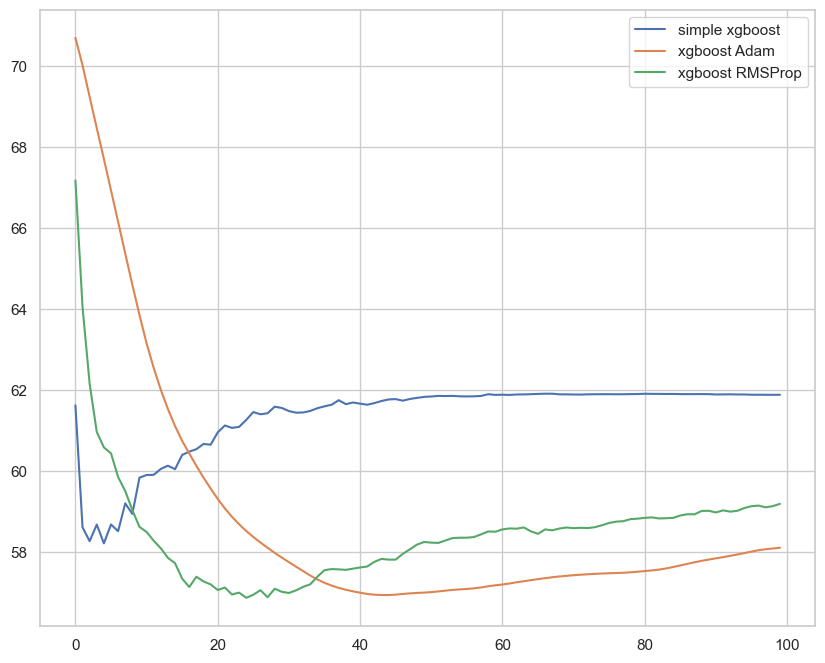

In [9]:
plt.figure(figsize=(10, 8))
sns.lineplot(y=eval_res["validation_0"]["rmse"], x=range(len(eval_res["validation_0"]["rmse"])), label="simple xgboost")
sns.lineplot(y = results['Adam']["test"], x = range(len(results['Adam']["test"])), label="xgboost Adam")
sns.lineplot(y = results['RMSprop']["test"], x = range(len(results['RMSprop']["test"])), label="xgboost RMSProp")

## Comparing CustomXGBoost with Original XGBoost

In [10]:
custom = XGBRegressor()
custom.fit(X_train.values, y_train, eval_set = (X_test.values, y_test))

y_pred = custom.predict(X_test.values)

[0] validation_set-rmse : 62.20998923459462	[0] train_set-rmse : 61.6388100479816
[1] validation_set-rmse : 59.43908774293955	[1] train_set-rmse : 49.56706463046613
[2] validation_set-rmse : 57.95801239287636	[2] train_set-rmse : 39.58608060958659
[3] validation_set-rmse : 58.30915863461083	[3] train_set-rmse : 32.39192242015271
[4] validation_set-rmse : 58.32042441783062	[4] train_set-rmse : 27.061041380448476
[5] validation_set-rmse : 57.807713740302454	[5] train_set-rmse : 23.495106513351974
[6] validation_set-rmse : 58.69438775384488	[6] train_set-rmse : 19.734204137001445
[7] validation_set-rmse : 58.88355612588092	[7] train_set-rmse : 17.269524083362114
[8] validation_set-rmse : 59.40328517380289	[8] train_set-rmse : 15.50432080738733
[9] validation_set-rmse : 59.50598042357487	[9] train_set-rmse : 13.851231511096923
[10] validation_set-rmse : 59.51711847353583	[10] train_set-rmse : 12.354215286802965
[11] validation_set-rmse : 59.370550375025246	[11] train_set-rmse : 11.39668805

<Axes: >

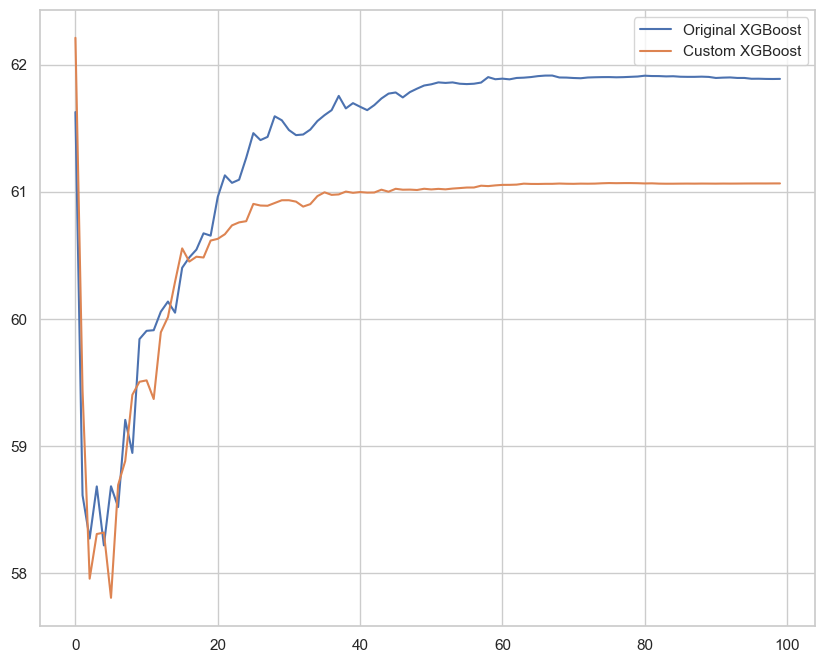

In [11]:
plt.figure(figsize=(10, 8))
sns.lineplot(y=eval_res["validation_0"]["rmse"], x=range(len(eval_res["validation_0"]["rmse"])), label="Original XGBoost")
sns.lineplot(y=custom.history["test"], x=range(len(custom.history["test"])), label="Custom XGBoost")